In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
from sklearn.model_selection import train_test_split

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

impute = SimpleImputer(strategy='most_frequent')
enc = LabelEncoder()

X = train.drop('Survived', axis=1).drop('Name', axis=1).values[:, 1:]
y = train['Survived'].values

X = impute.fit_transform(X)
for i in range(len(train.columns) - 3):
    X[:, i] = enc.fit_transform(X[:, i])
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(math.log2(len(train))))

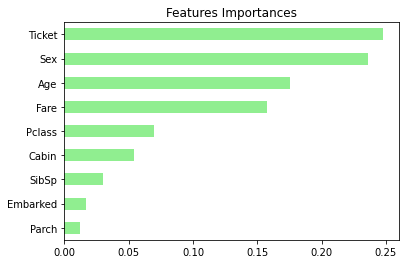

Test set RMSE of sgbr: 0.445
Accuracy: 0.802


In [33]:
sgbr = GradientBoostingClassifier(max_depth=math.log2(len(train.columns) - 3),
            learning_rate=0.05,
            subsample=0.7,
            max_features=0.75,
            n_estimators=3000,                                
            random_state=int(math.log2(len(train))))

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Create a pd.Series of features importances
importances = pd.Series(data=sgbr.feature_importances_,
                        index= train.drop('Survived', axis=1).drop('Name', axis=1).columns[1:])

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test.mean() ** 0.5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))
print('Accuracy: {:.3f}'.format(accuracy))

In [ ]:
X_submit = test.drop('Name', axis=1).values[:, 1:]

X_submit = impute.fit_transform(X_submit)
for i in range(len(test.columns) - 2):
    X_submit[:, i] = enc.fit_transform(X_submit[:, i])
    
y_predict = np.abs(sgbr.predict(X_submit).round()).astype('int64')
df_predict = pd.DataFrame({'PassengerId':test.iloc[:, 0].values, 'Survived':y_predict})
df_predict = df_predict.set_index('PassengerId')
df_predict.to_csv('result.csv')
print(df_predict)